In [5]:
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

如果把分类任务直接当成回归来做的话，那么会存在2个问题：
- regression会惩罚那些太正确的点（离分界面很远的那些点）
- 假设有3类，如果直接把1,2,3三个数字作为回归的目标时，那么1和2之间的距离、2和3之间的距离要比1和3之间的距离要近，而其实1，2，3作为3个类别是没有距离概念的。

**其实分类问题（生成式模型）本质就是贝叶斯公式。** 现在假设有2个类C1,C2，分类任务就是给定一个样本x，判断该样本属于C1还是C2，具体怎样判断呢？我们可以将这个问题转换为给定一个样本x，得到该样本属于C1和C2的概率，根据概率值判断是否属于这个类（如概率大于0.5）。根据贝叶斯公式，样本x属于C1类的概率为：
$$
P(C_1|x)=\frac{P(x|C_1)P(C_1)}{P(x|C_1)P(C_1)+P(x|C_2)P(C_2)}
$$
**这个贝叶斯公式是生成式模型的本质！**
为了得到$P(C_1|x)$，就需要知道4个概率：2个先验概率$P(C_1)、P(C_2)$以及$P(x|C_1)$、$P(x|C_2)$，这也是为什么叫生成式模型的原因，因为一旦有了这4个概率分布，我们就可以根据这个概率分布自己生成数据。

那么怎样得到这4个概率分布呢，2个先验概率$P(C_1)、P(C_2)$可以简单地根据C1和C2类的占比来得到，但是$P(x|C_1)$和$P(x|C_2)$如果直接用x在C1中出现的次数/C1的总样本数，那么x可能在C1中压根就没有出现过（x来自测试集嘛），因此我们需要**估计出C1中x的概率分布（$P(x|C_1)$）和C2中x的概率分布（$P(x|C_2)$）。**
**做法是，先假设C1、C2中x都服从某一类分布，如M维高斯分布，然后通过极大似然法得到分布的参数。**

- **高斯分布的参数可以不一样，即均值向量$\mathbf{u_1}$不等于 $\mathbf{u_2}$（$\mathbf{u_1}$和$\mathbf{u_2}$为M维向量，M为特征个数），协方差矩阵$\Sigma_1$也不等于$\Sigma_2$**
- **高斯分布的参数也可以一样，但是肯定不能完全一样。比即均值向量$\mathbf{u_1}$不等于 $\mathbf{u_2}$，但协方差矩阵$\Sigma_1$等于$\Sigma_2$**

一般采用第二种方式，即让分布的某些参数相同，这样可以减少参数数量，且学习效果也可能变好。**视频中将两个分布share相同的协方差矩阵后，分界面变成线性的了**，分类效果也变好了，具体原因下面再解释。

之前的视频中说到机器学习任务可以分为3个部分，model(function set)、loss function、找到最优参数，对于分类问题，
1. model就是
$P(C_1|x)=\frac{P(x|C_1)P(C_1)}{P(x|C_1)P(C_1)+P(x|C_2)P(C_2)}$，如果P大于0.5，则属于C1类。
2. loss function损失函数其实就是极大似然中的似然函数。
3. 找到最优参数就是极大似然法求得最优的参数。


---

当然也可以**假设feature之间是相互独立（朴素贝叶斯）** 的（即每一列feature都服从一个一维的高斯分布，即协方差矩阵非对角线位置全为0），但这样效果可能会变差，因为模型变简单了。

当然也可以不假设服从高斯分布，比如某个feature取值为0和1，可以假设其服从伯努利分布。


---

**由贝叶斯后验概率公式得到sigmoid函数：**


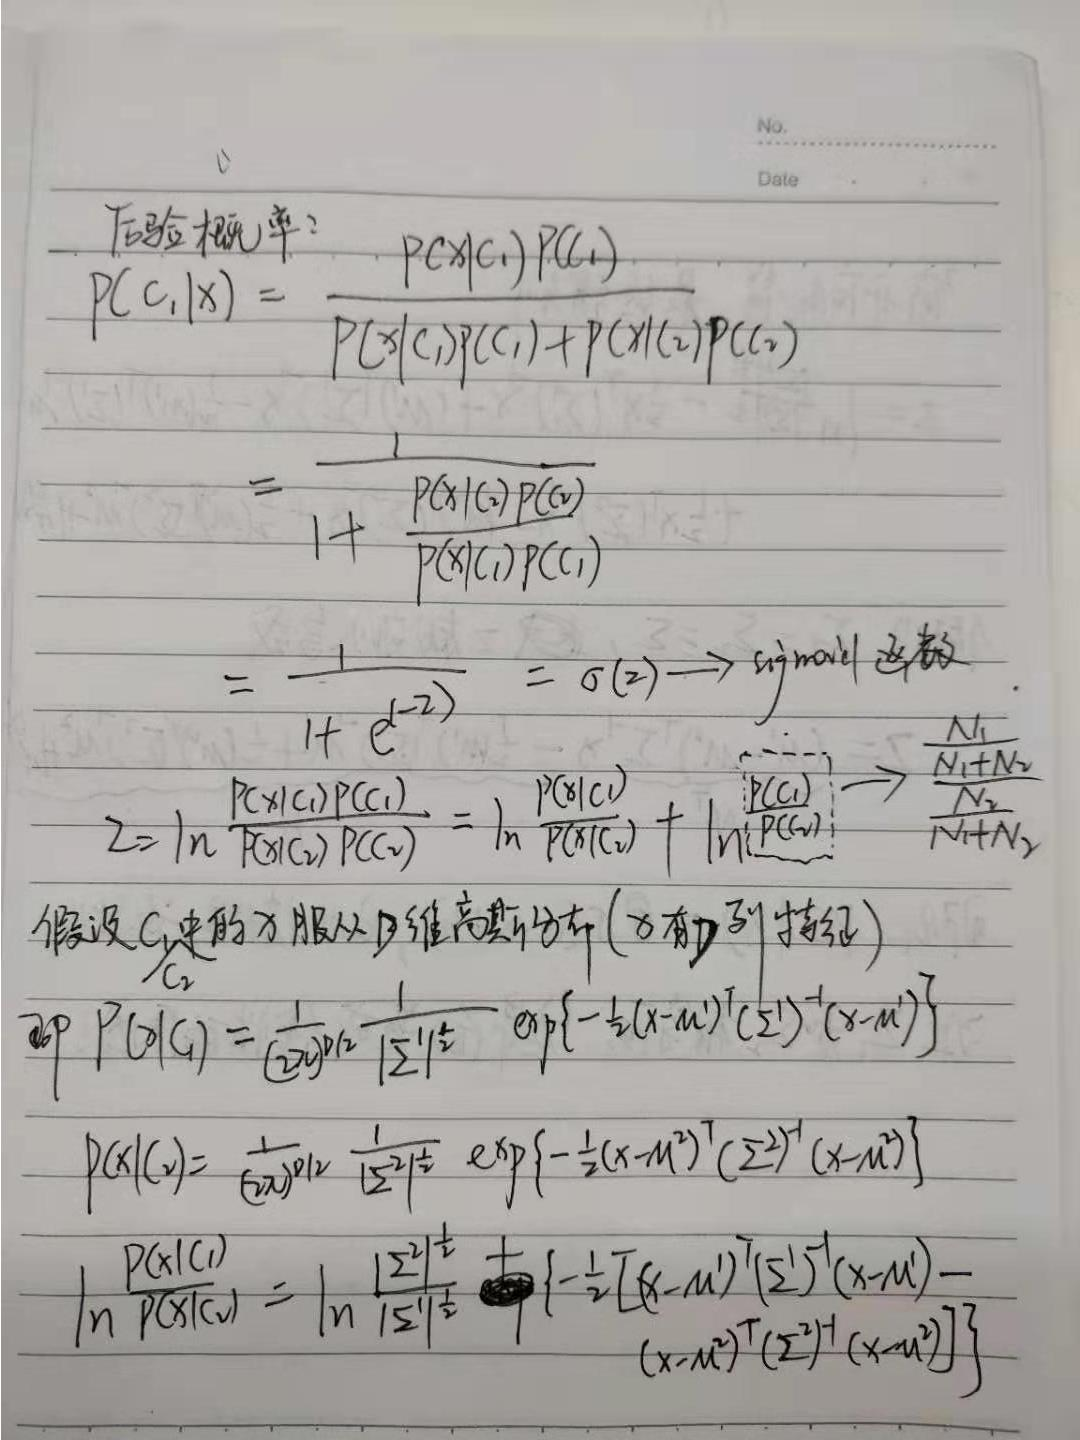

In [6]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li7.jpg', width=500, height=200)



**当协方差矩阵$\Sigma_1$和$\Sigma_2$相等时，可以得到线性分界面。**


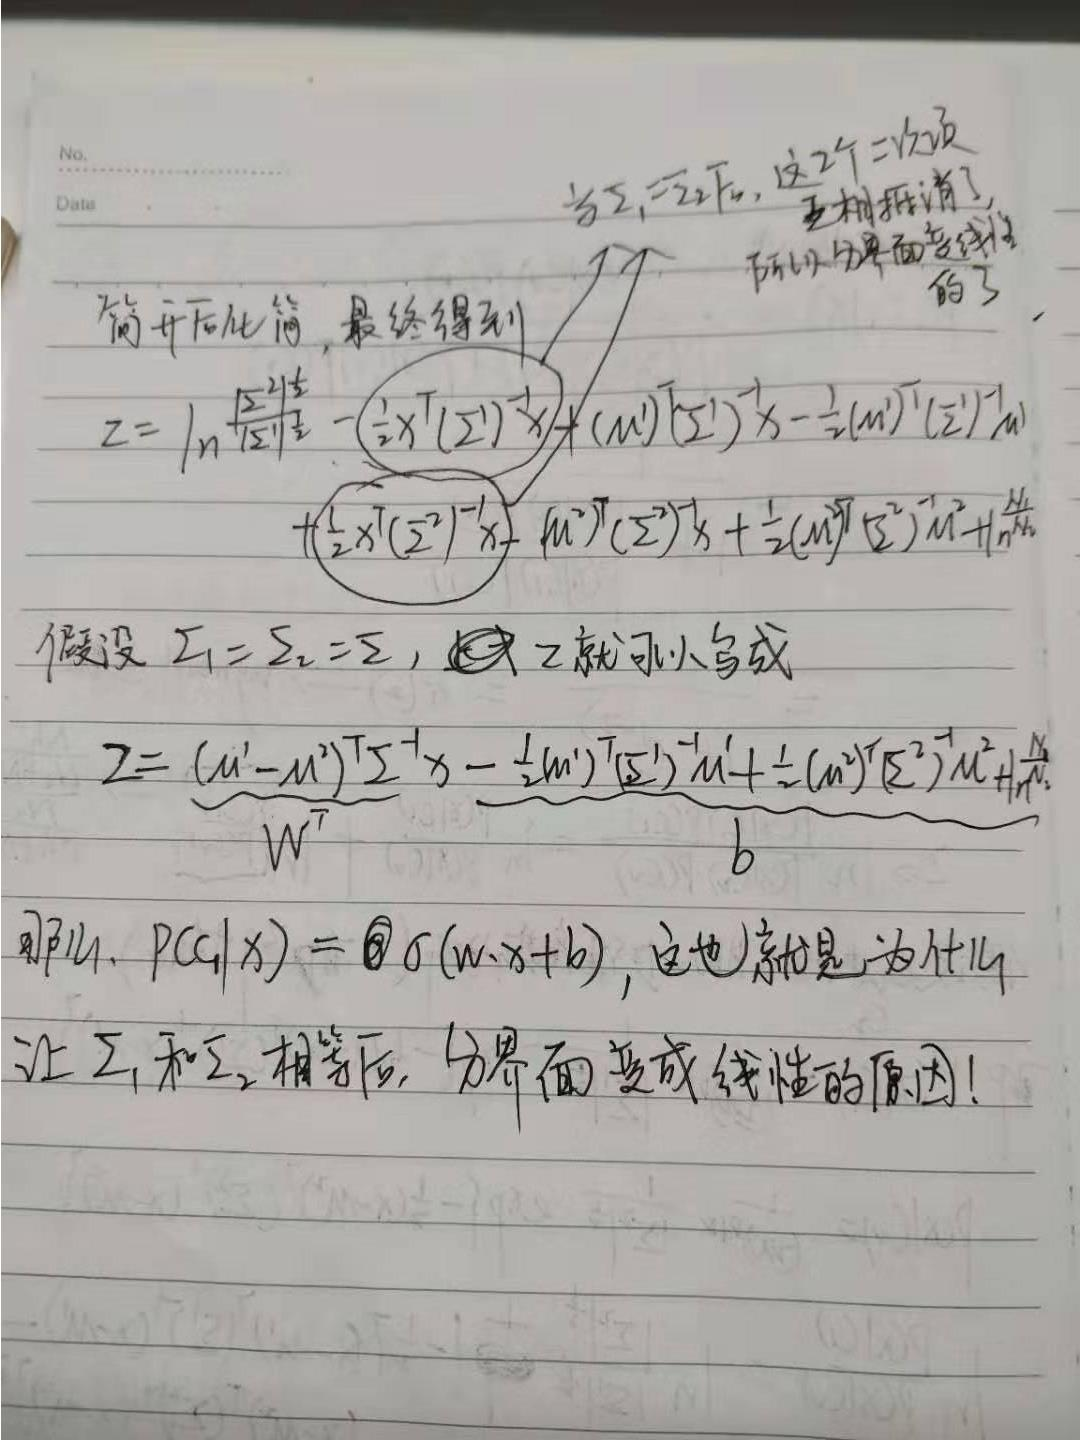

In [7]:
Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li8.jpg', width=500, height=200)




**在生成式模型中，我们需要估计出N1,N2,u1,u2,$\Sigma$，进而得到w和b，那么为什么不直接通过训练得到w和b呢？（生成式和判别式的区别）Logistic回归就是这么干的！**

**也就是说，对于生成式模型来说，分界面为线性的原因在于：两个类别C1和C2下x的协方差矩阵相同（存在协方差矩阵的前提是两个类别C1和C2下x同时服从D维的高斯分布，若是其他分布，就不一定是协方差矩阵相同这个原因了）**

**总结起来就2点：1.~~sigmoid函数本质是贝叶斯后验概率公式~~sigmoid函数可以由贝叶斯公式推导得到。  2.~~逻辑斯蒂回归中的线性分界面的本质是两个类别C1和C2下x的协方差矩阵相同~~。**

**Logistic回归也是假设两个类别C1和C2下x同时服从D维的高斯分布吗？？？？？不是，LR是判别式模型，不需要假设数据分布，逻辑斯蒂回归中分界面是线性的就是单纯直接假设出来的，跟之前$\Sigma_1$和$\Sigma_2$相等时得到的分界面是线性的具有本质上的不同，因为一个是判别式模型，一个是生成式模型。**

